# <center> Treaty Game: Functions and Parameters

## 1. Income functions:

$\textbf{For natives}$:
         $$\large I_n = \frac{A_1}{1+e^{(-B_1*(L_n - C_1))}} -  \frac{A_1}{1+e^{(B_1*C_1)}}$$
where $A_1, B_1,$ and $C_1$ are parameters. $L_n$ is the land owned by the native.

$\textbf{For settlers}$:
         $$\large I_s = \frac{A_2}{1+e^{(-B_2*(L_s - C_2))}} -  \frac{A_2}{1+e^{(B_2*C_2)}}$$
where $A_2, B_2,$ and $C_2$ are parameters. $L_s$ is the land owned by the settler.

$\textbf{Note}:$ It always has $L_s + L_n = 100.$

## 2. Expansion functions

$\textbf{For natives}$:
         $$\large E_n = \frac{S_n^{(1-\gamma)}}{L_n+D}*(H-L_n)$$
where $\gamma, D$ and $H$ are parameters. $L_n$ is the land owned by the native. $S_n$ is the native's spending on expansion. In another form,
         $$\large S_n = \big( E_n * \frac{L_n+D}{H-L_n} \big)^{\frac{1}{1-\gamma}} $$


$\textbf{For settlers}$:
         $$\large E_s = \frac{S_s^{(1-\beta)}}{L_s+D+E}*(H-L_s)$$
where $\beta, D, E$ and $H$ are parameters. $L_s$ is the land owned by the settler. $S_s$ is the settler's spending on expansion. In aother form,
         $$\large S_s = \big( E_s * \frac{L_s+D+E}{H-L_s} \big)^{\frac{1}{1-\beta}} $$

$\textbf{Note:}$ The land change for the native is $L_n + E_n - E_s$. For the settler, it is $L_s + E_s - E_n$.

## 3. Parameters and income plot
Below are the currently used parameters.

In [1]:
A1 = 120; B1 = 0.045; C1=18  # native's income
A2 = 180; B2 = 0.065; C2=40  # settler's income

gamma = 0.5         # native's expansion
beta = 0.5; E = 150  # settler's expansion. note: OLD E=100
D = 20; H = 150      # common params for both. note: OLD D=0  

# another two parameters
prob = 1/12      # probability of ending the game in each period.
n_default = 10  # default periods without uncertainty at the beginning of the game

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Income(land, params):
    A, B, C = params
    left = A/(1+np.exp(-B*(land-C)))
    right = A/(1+np.exp(B*C))
    return left - right

In [3]:
Income(40, [A2, B2, C2]) # settler's income

77.55508433819757

In [4]:
Income(60, [A1, B1, C1]) # native's income

67.30380418359178

In [5]:
def ExpansionCost(expansion, c_land, params, player='N'):
    if player == 'N':
        D, H, gamma = params
        cost = (expansion * (c_land + D)/(H - c_land))**(1/(1-gamma))
    if player == 'S':
        D, E, H, beta = params
        cost = (expansion * (c_land + D + E)/(H - c_land))**(1/(1-beta))
    return cost

In [6]:
ExpansionCost(10, 20, [D, E, H, beta], 'S') # settler's expansion cost

213.60946745562129

In [15]:
ExpansionCost(30, 0, [D, H, gamma], 'N') # Native's expansion cost

16.0

In [16]:
land = np.linspace(0, 100, 100)
I_n = Income(land, [A1, B1, C1])
I_s = Income(100 - land, [A2, B2, C2])
Total_income = I_n + I_s

Incomes = [I_n, I_s, Total_income]
Labels = ['Native', 'Settler', 'Total']

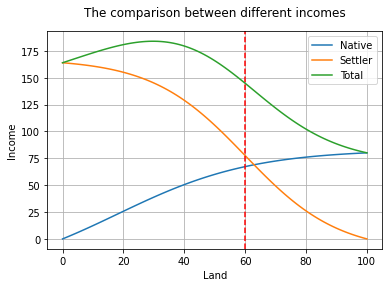

In [19]:
for income, label in zip(Incomes, Labels):
    plt.plot(land, income, label = label)
plt.legend()
plt.grid()
plt.xlabel('Land')
plt.ylabel('Income')
plt.title('The comparison between different incomes', pad=15, size=12)
plt.axvline(60, c='r', linestyle='--');

$\textbf{Note}:$ With current parameters, the land split in the Nash equilibrium is: $L_n = 60$ and $L_s = 40$. For expansion, 
$S_s = 69$ and $N_s = 15$. 

## 4. Cost function

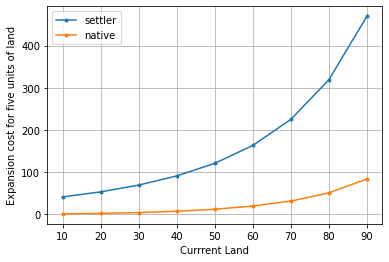

In [18]:
current_land = np.arange(10, 95, 10)
s_expansion_costs = [ExpansionCost(5, l, [D, E, H, beta], 'S') for l in current_land]
n_expansion_costs = [ExpansionCost(5, l, [D, H, gamma], 'N') for l in current_land]

plt.plot(current_land, s_expansion_costs, '.-', label='settler')
plt.plot(current_land, n_expansion_costs, '.-', label='native')
plt.legend()
plt.xlabel('Currrent Land')
plt.ylabel('Expansion cost for five units of land')
plt.grid();

### <center> Functions to simulate treaty length

## 1. Propose a new treaty
Gudiance: The purpose of treaty is to save from fighting and earn more benefits. For settlers, when the cost of fighting (land expansion) is higher or when the land split is far away from the global efficiency, it becomes more profitable to propose a treaty.
The probability of proposing a new treaty could be some functions like,
    $$ p = f(S_{land}, S_{spending}), $$
where $p$ is descreasing with $S_{land}$ and increasing with $S_{spending}$.
A candidate function could be 
    $$ p = \frac{1}{1+e^{-a*S_{spending}} - b*|S_{land} - S_{efficiency-land}|}.$$
where $a, b$ are postive constants.

## 2. Content of a new treaty
How to split the land? How much should the annuity or lump sum be?
This might need some assumption about how should the two subjects shares the total benefits. This might be determined by one's sense of fairness and understanding of the experiment.

## 3. End a treaty
A treaty could be ending by both subjects. The motivation of ending a treaty more likely comes from an understaning that there are more profitable treaties. For settler, ending a treaty might be determined be the 'profit distance' between the current treaty and the 'best treaty'. For native, ...



## Probability calculation for experiment

In [1]:
import numpy as np
from scipy.stats import geom
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p = 1/6

In [3]:
WheelPort = geom.cdf(k=12, p=p) # probaility of running >= 13 periods
WheelPort

0.8878433452153849

In [4]:
periods = np.arange(1, 13)
np.round(geom.pmf(k=periods, p=p)/WheelPort * 100)

array([19., 16., 13., 11.,  9.,  8.,  6.,  5.,  4.,  4.,  3.,  3.])

## pdf for periods in each match

In [5]:
periods = np.arange(1, 41)
geom_pdf = geom.pmf(k = periods, p=p)

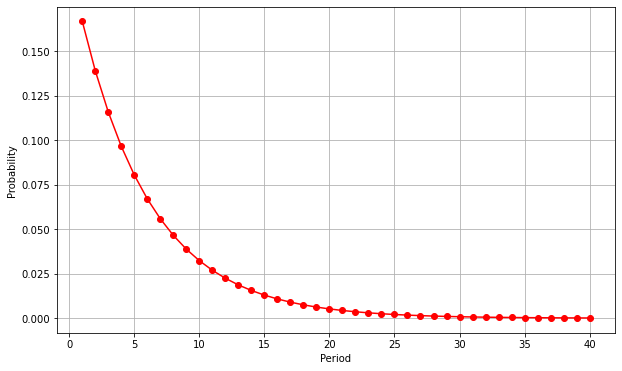

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(periods, geom_pdf, 'o-r')
plt.grid()
plt.xlabel('Period')
plt.ylabel('Probability');

In [19]:
pd.DataFrame(zip(periods, geom_pdf), columns=['period', 'probability'])

,period,probability
0,1,0.166667
1,2,0.138889
2,3,0.115741
3,4,0.096451
4,5,0.080376
5,6,0.066980
6,7,0.055816
7,8,0.046514
8,9,0.038761
9,10,0.032301


### Random draw simulations

In [43]:
p = 1/12
n_max = 24
period = 6
p_draws = geom.rvs(p, size=1000)

possible_periods = np.arange(period, period+n_max, period)
p_draws[p_draws >=n_max] = 24

p_periods_match = p_draws.copy()
for i in possible_periods:
    p_periods_match[(p_periods_match<=i) & (p_periods_match>i-period)] = i

In [44]:
# effective payments periods
eff_pay = p_draws.sum()/p_periods_match.sum() * 100
eff_pay

81.59250585480093

In [45]:
# average periods in each match
p_periods_match.mean()

12.81

In [78]:
geom.rvs(p, size=9)

array([28, 12,  7, 17,  1,  6,  3, 15,  4])

### Time and match choice

In [20]:
T = 90  # 2h experiments (30 mins for instrcution and 90 mins for subjects)
seconds_period = 40
tot_period = T*60/40
tot_period

135.0

### Payments multiplier

In [107]:
s_income = 41
n_income = 85
n_match = 9
ave_periods = 13
payment = 25

tot_n_income = n_income * n_match * ave_periods
tot_s_income = s_income * n_match * ave_periods
n_exchange_rate = tot_n_income/payment
s_exchange_rate =  tot_s_income/payment

n_exchange_rate, s_exchange_rate

(397.8, 191.88)

# Questions

1. Initialization: land split, endowments
2. Design: total periods, blocks, matches
3. Decision: decision time (treaty, expansion)